# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
data=pd.read_csv("Churn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Understanding the data

In [ ]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
D=data['customerID']
data=data.drop('customerID',axis=1)

In [4]:
data[data.iloc[:,:]==' '] = np.NaN

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
data=data.fillna(data.median())
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [6]:
data['gender'] = data['gender'].map({'Female':0, 'Male':1})
data['Partner'] = data['Partner'].map({'Yes':1,'No':0})
data['Dependents'] = data['Dependents'].map({'Yes':1,'No':0})
data['PhoneService'] = data['PhoneService'].map({'Yes':1,'No':0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes':1,'No':0, 'No phone service':0})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes':1,'No':0, 'No internet service':0})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes':1,'No':0, 'No internet service':0})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes':1,'No':0, 'No internet service':0})
data['TechSupport'] = data['TechSupport'].map({'Yes':1,'No':0, 'No internet service':0})
data['StreamingTV'] = data['StreamingTV'].map({'Yes':1,'No':0, 'No internet service':0})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes':1,'No':0, 'No internet service':0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes':1,'No':0})
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})



In [7]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]

In [8]:
object_features = list(X.select_dtypes(include=['object']).columns)
for i in object_features:
    X = pd.concat([X,pd.get_dummies(X[i], prefix=i)],axis=1)
    X.drop(i, axis = 1, inplace=True)

In [9]:
numerical_features = list(X.select_dtypes(include=['int64', 'float64', 'int32','uint8']).columns)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
ss_scaler = StandardScaler()
X = pd.DataFrame(data = X)
X[numerical_features] = ss_scaler.fit_transform(X[numerical_features])


In [10]:
corr=X.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]


### Data Visualization

[0.04130839 0.02811979 0.0340167  0.02793547 0.19684469 0.00829298
 0.02667351 0.02672111 0.02862976 0.02749352 0.02598118 0.02400902
 0.02522259 0.03279917 0.19180315 0.01023473 0.03981243 0.01267029
 0.0865487  0.01128256 0.02453239 0.01270829 0.01359666 0.03113484
 0.01162809]


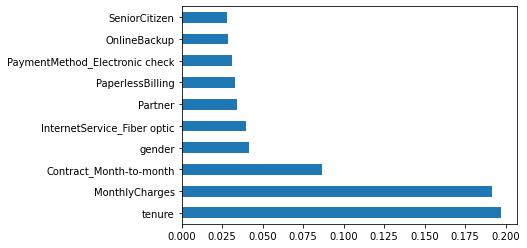

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
def customercountplot(x):
    z = "Customer Count wrt "+ x
    plt.title(z,size=20)
    sns.countplot(X[x])

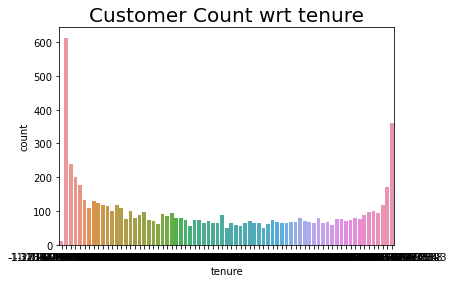

In [16]:
customercountplot('tenure')

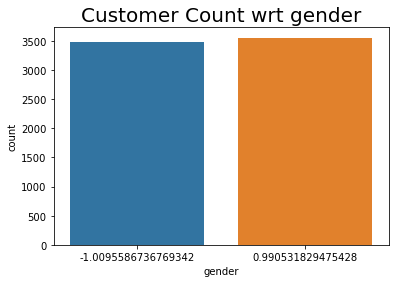

In [19]:
customercountplot('gender')

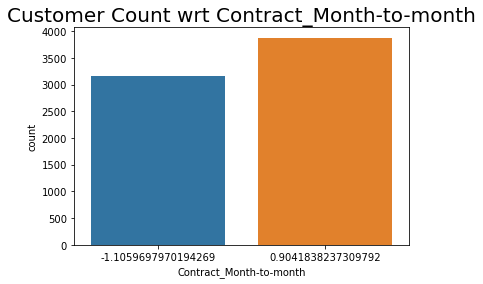

In [21]:
customercountplot('Contract_Month-to-month')

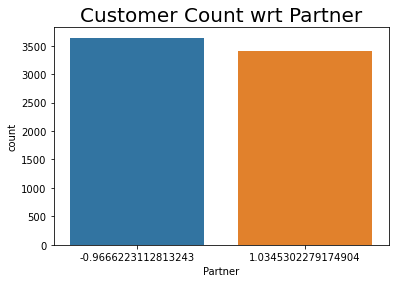

In [22]:
customercountplot('Partner')

<AxesSubplot:title={'center':'Distribution Plot For Montly Charges'}, xlabel='MonthlyCharges'>

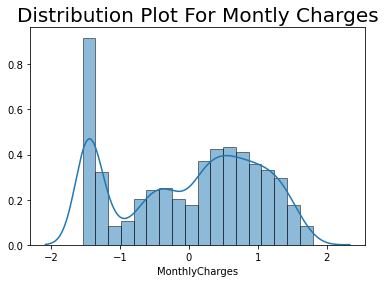

In [23]:
plt.title("Distribution Plot For Montly Charges",size=20)
sns.distplot(X['MonthlyCharges'],hist_kws={'edgecolor':'black','alpha':.5})

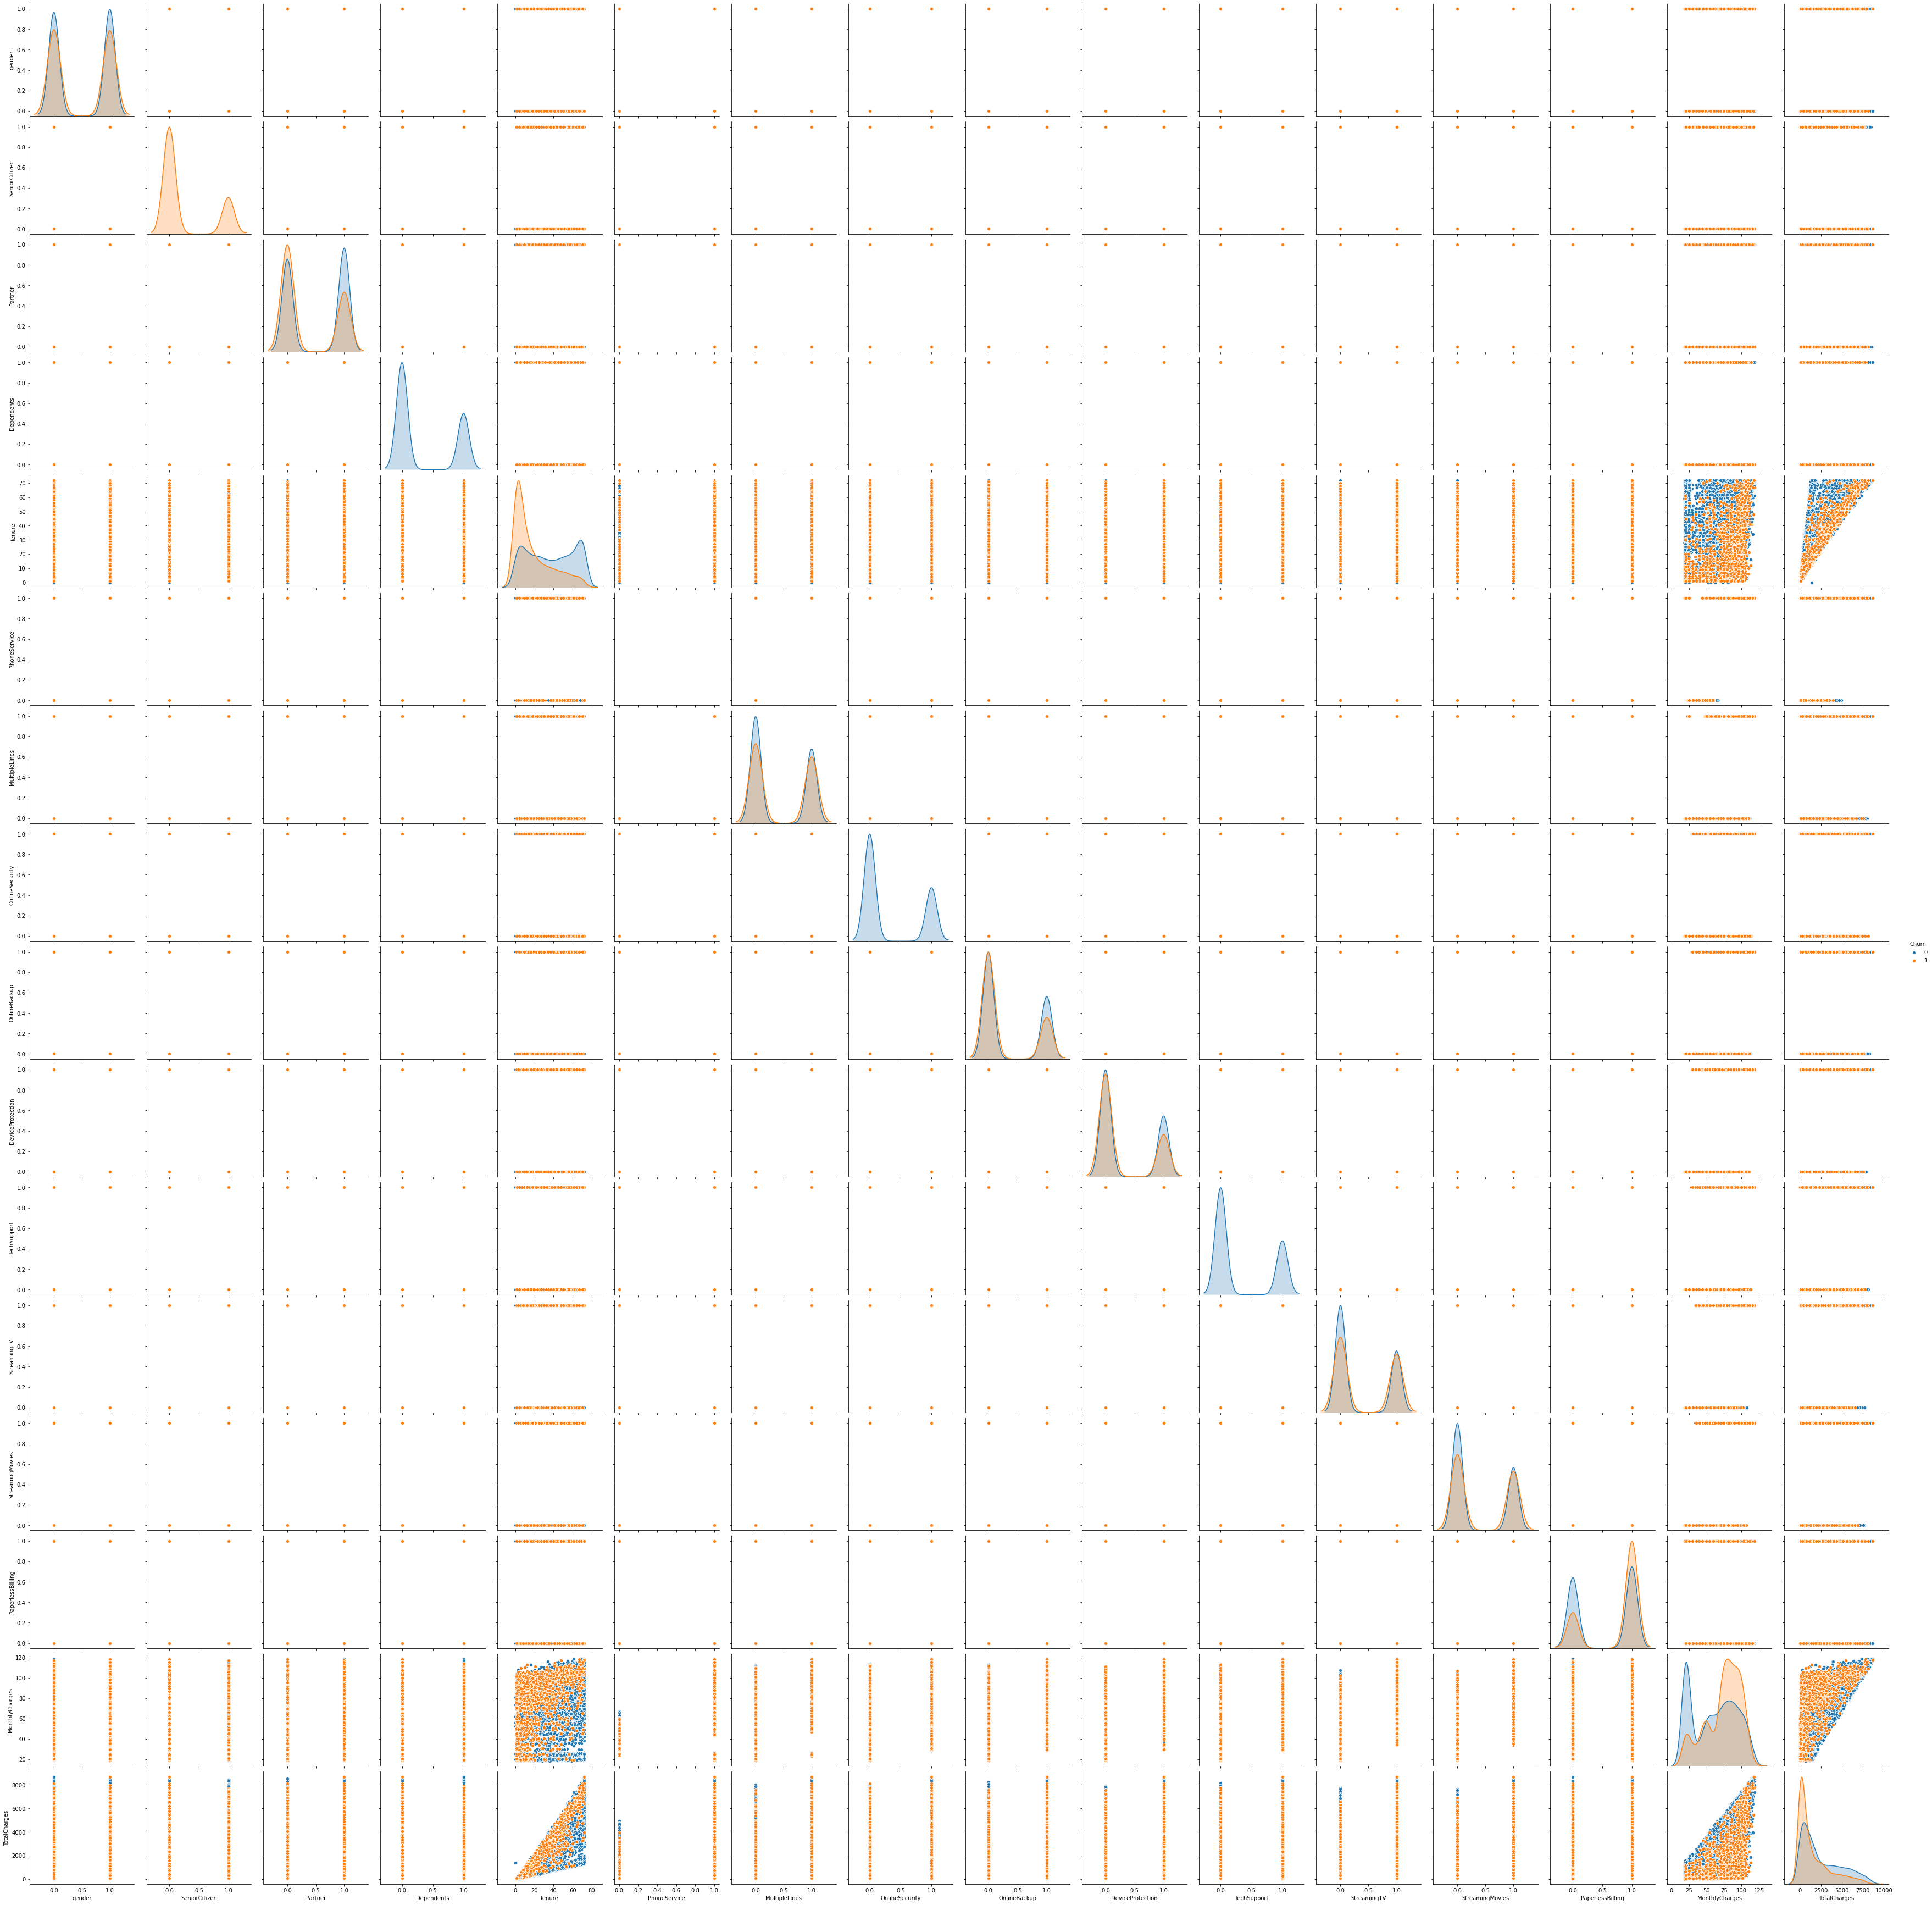

In [28]:
sns.pairplot(data, hue="Churn", size=3)

In [1]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [24]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Logistic Regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred1=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.8197303051809794
Precision: 0.6888888888888889
Recall: 0.5817694369973191


### SVM

In [28]:

svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.8211497515968772
Precision: 0.6850152905198776
Recall: 0.6005361930294906


### Naive Bayes

In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred3 = nb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

Accuracy: 0.7558552164655784
Precision: 0.5251299826689775
Recall: 0.8123324396782842


### Random Forest Classifier

In [30]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf.fit(X_train, y_train)
y_pred4=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

Accuracy: 0.7913413768630234
Precision: 0.6436363636363637
Recall: 0.4745308310991957


### Model Evaluation

accuracy:   82.115
[[933 103]
 [149 224]]


Text(26.5, 0.5, 'true values')

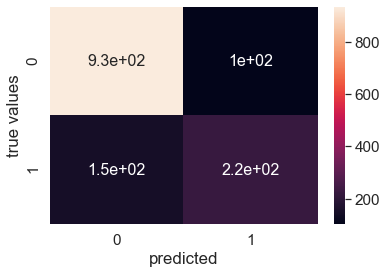

In [31]:
#SVM
score = metrics.accuracy_score(y_test, y_pred2)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, y_pred2, labels=[0,1])
print(cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred2)
print('AUC: %.3f' % auc)

AUC: 0.751


### Final Conclusions

**My Final Conclusions are:**
- I have used 4 Classification Models Logistic Regression, SVM, Naive Bayes, RandomForest.
- Achieved maximum accuracy with SVM of 82%.
- Our Data consist of Unbalance Class.
- Unbalanced class can be dealed with SMOTE.
- Accuracy can further be increased by Parameter Tuning.

### Task Questions

#### Variable Selection

Variables are selected after applying One Hot Encoding to variables and then removing the features using Correlation Matrix and using only those features that are correlated greater than 80%.

 

#### Performance

It is been displayed in the Model Evaluation Section.

#### Key Factors

Acoording to the Extra Tree Clasiifier graph presented at Data Vizualisation section the key factors are as follows:
<br>
- Tenure
- Monthly Charges
- Gender
- Contract Time
- Type of Internet Facility Used(Fiber Optic)

#### Offers

Certains offers that the telecom company can provide the users are as follows:
<br>
- If the customer is aged then the comapnay could provide the needed Tech Support fastly as Possible.
- The comapany should reduce the monthly charges for the Fiber Optic Internet so most of the users can use it and can't complain regarding the network.
- The comapny could provide both Streaming Tv and Movies at an average price so that customer can buy both like most of the SetUpBox(ex. Tatasky)  have started to do so.
- The company can provide Annual, Half-Yearly, Quaterly Packs.

#### Results

- If everything worked accordingly then people may pay for more months in a single go not only be dependent on the monthly packs.
- The tenure will also be increased accordingly.